### 정확도 Accuracy의 문제점

In [1]:
from sklearn.base import BaseEstimator
import numpy as np

class MyDummyClassifier (BaseEstimator):
  # fit 메서드는 아무것도 학습 X
  def fit(self, X , y = None):
    pass

# self에는 메서드를 호출한 객체(인스턴스)가 자동으로 전달

  def predict(self, X):
    pred = np.zeros((X.shape[0], 1))
    for i in range(X.shape[0]):
      if X['Sex'].iloc[i] == 1:
        pred[i] = 0
      else:
        pred[i] = 1
    return pred

In [2]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv('/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 0)
# Dummy classifier 를 통해 예측
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)
mypredictions = myclf.predict(X_test)
print('Dummy 분류기의 정확도 : {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy 분류기의 정확도 : 0.7877


-> 단순한 알고리즘으로 예측을 해도 데이터가 어떻게 구성되었는가에 따라 정확도 결과가 높게 나올 수도 있어, 단순한 정확도만으로는 객관적인 평가 지표가 되기 어렵다.

### Confusion Matrix 오차 행렬

In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
  def fit(self, X, y):
    pass

  def predict(self, X):
    return np.zeros((len(X), 1), dtype = bool)

digits = load_digits()
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 11)

### **df.astype({col : dtype})**

In [5]:
col1 = [1, 2, 3, 4]
col2 = ['one', 'two', 'three', 'four']
col3 = [1.5, 2.5, 3.5, 4.5]
col4 = [True, False, False, True]
index = ['row1','row2','row3','row4']
df = pd.DataFrame(index=index, data={"col1": col1, "col2": col2, "col3": col3, "col4": col4})
print(df)


      col1   col2  col3   col4
row1     1    one   1.5   True
row2     2    two   2.5  False
row3     3  three   3.5  False
row4     4   four   4.5   True


In [6]:
df.astype({ 'col4' : 'int'})

,col1,col2,col3,col4
row1,1,one,1.5,1
row2,2,two,2.5,0
row3,3,three,3.5,0
row4,4,four,4.5,1


In [7]:
print(y_test.shape)
print('테스트 set label 0과 1의 분포도 : \n', pd.Series(y_test).value_counts())
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)

(450,)
테스트 set label 0과 1의 분포도 : 
 0    405
1     45
dtype: int64


In [8]:
fakepred = fakeclf.predict(X_test)
print('모두 0으로 예측했을 때 정확도 : \n {0:.3f}'.format(accuracy_score(y_test, fakepred)))

모두 0으로 예측했을 때 정확도 : 
 0.900


In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]])

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}'.format(accuracy, precision, recall))

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.20, random_state = 11)
lr_clf = LogisticRegression(solver = 'liblinear')

lr_clf.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [12]:
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도 : 0.8246, 재현율 : 0.7705


In [13]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print(pred_proba.shape)
print(pred_proba[:3])

(179, 2)
[[0.44935227 0.55064773]
 [0.86335512 0.13664488]
 [0.86429645 0.13570355]]


In [14]:
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis = 1)
print(pred_proba_result[:10])

[[0.44935227 0.55064773 1.        ]
 [0.86335512 0.13664488 0.        ]
 [0.86429645 0.13570355 0.        ]
 [0.8496852  0.1503148  0.        ]
 [0.82343411 0.17656589 0.        ]
 [0.84231224 0.15768776 0.        ]
 [0.8709549  0.1290451  0.        ]
 [0.27228603 0.72771397 1.        ]
 [0.78185129 0.21814871 0.        ]
 [0.33185994 0.66814006 1.        ]]


### 사이킷런의 정밀도 / 재현율 trade off 방식 이해하기

In [15]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
     [2, 0 ,0],
     [0, 1.1, 1.2]]
binarizer = Binarizer(threshold = 1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [16]:
# Pseudo Code
from sklearn.preprocessing import Binarizer
# Binarizer의 threshold 설정값 : 분류 결정 임계값
custom_threshold = 0.5
# predict_proba() 반환값의 두 번째 칼럼, 즉 positive 클래스 칼럼 하나만 추출해 binarizer를 적용
pred_proba_1 = pred_proba[: , 1].reshape(-1,1)
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도 : 0.8246, 재현율 : 0.7705


In [17]:
# 임계값을 낮춘 코드
# Binarizer의 threshold 설정값 : 분류 결정 임계값
custom_threshold = 0.4
# predict_proba() 반환값의 두 번째 칼럼, 즉 positive 클래스 칼럼 하나만 추출해 binarizer를 적용
pred_proba_1 = pred_proba[: , 1].reshape(-1,1)
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[97 21]
 [11 50]]
정확도 : 0.8212, 정밀도 : 0.7042, 재현율 : 0.8197


In [18]:
# 임계값을 높인 코드
# Binarizer의 threshold 설정값 : 분류 결정 임계값
custom_threshold = 0.6
# predict_proba() 반환값의 두 번째 칼럼, 즉 positive 클래스 칼럼 하나만 추출해 binarizer를 적용
pred_proba_1 = pred_proba[: , 1].reshape(-1,1)
binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[113   5]
 [ 17  44]]
정확도 : 0.8771, 정밀도 : 0.8980, 재현율 : 0.7213


In [19]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
  # thresholds list 객체 내의 값을 차례로 iteration하면서 Evaluation 수행
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임곗값 : ', custom_threshold)
    get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1, 1), thresholds)


임곗값 :  0.4
오차 행렬
[[97 21]
 [11 50]]
정확도 : 0.8212, 정밀도 : 0.7042, 재현율 : 0.8197
임곗값 :  0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도 : 0.8547, 정밀도 : 0.7869, 재현율 : 0.7869
임곗값 :  0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도 : 0.8246, 재현율 : 0.7705
임곗값 :  0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도 : 0.8715, 정밀도 : 0.8654, 재현율 : 0.7377
임곗값 :  0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도 : 0.8771, 정밀도 : 0.8980, 재현율 : 0.7213


In [20]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print(thresholds.shape)

(165,)


In [21]:
thr_index = np.arange(0, thresholds.shape[0], 15)
print(thr_index)
print(np.round(thresholds[thr_index],2))

[  0  15  30  45  60  75  90 105 120 135 150]
[0.02 0.11 0.13 0.14 0.16 0.24 0.32 0.45 0.62 0.73 0.87]


In [22]:
print(np.round(precisions[thr_index],3))
print(np.round(recalls[thr_index], 3))

[0.341 0.372 0.401 0.44  0.505 0.598 0.688 0.774 0.915 0.968 0.938]
[1.    1.    0.967 0.902 0.902 0.902 0.869 0.787 0.705 0.492 0.246]


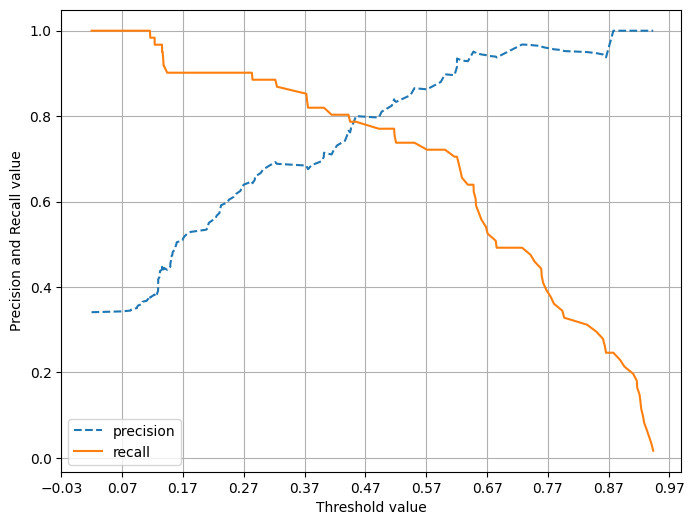

In [23]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)

    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))

    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [24]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print(f'F1 스코어 : {f1:.4f}')

F1 스코어 : 0.7966


In [25]:
def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 Score : {3:.4f}'.format(accuracy, precision, recall, f1))

threshold = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[: , 1].reshape(-1,1), threshold)

임곗값 :  0.4
오차 행렬
[[97 21]
 [11 50]]
정확도 : 0.8212, 정밀도 : 0.7042, 재현율 : 0.8197, F1 Score : 0.7576
임곗값 :  0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도 : 0.8547, 정밀도 : 0.7869, 재현율 : 0.7869, F1 Score : 0.7869
임곗값 :  0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도 : 0.8246, 재현율 : 0.7705, F1 Score : 0.7966
임곗값 :  0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도 : 0.8715, 정밀도 : 0.8654, 재현율 : 0.7377, F1 Score : 0.7965
임곗값 :  0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도 : 0.8771, 정밀도 : 0.8980, 재현율 : 0.7213, F1 Score : 0.8000


### ROC 커브 AUC

In [30]:
from sklearn.metrics import roc_curve
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
thr_index = np.arange(1, thresholds.shape[0], 5)
print(thr_index)
print(np.round(thresholds[thr_index], 2))
print(np.round(fprs[thr_index],3))
print(np.round(tprs[thr_index], 3))

[ 1  6 11 16 21 26 31 36 41 46]
[0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
[0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
[0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


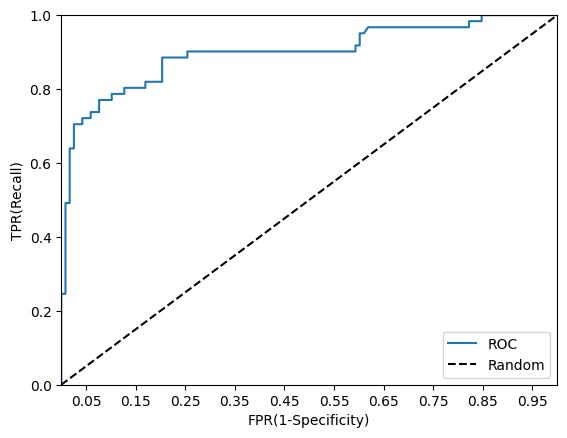

In [34]:
def roc_curve_plot(y_test, pred_proba_c1):
  fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
  plt.plot(fprs, tprs, label = 'ROC')
  plt.plot([0,1], [0,1], 'k--', label = 'Random')

  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))
  plt.xlim(0,1); plt.ylim(0,1)
  plt.xlabel('FPR(1-Specificity)'); plt.ylabel('TPR(Recall)')
  plt.legend()

roc_curve_plot(y_test, pred_proba[: , 1])

In [35]:
from sklearn.metrics import roc_auc_score
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값 : {0:.4f}'.format(roc_score))

ROC AUC 값 : 0.8987


In [36]:
def get_clf_eval(y_test, pred = None, pred_proba = None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 Score : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))